In [1]:
import pandas as pd

df = pd.read_csv('data/spotify_millsongdata.csv')
df.head()
df.info()
data = df.text.to_list()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [2]:
import nltk
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# nltk.download('wordnet')
# nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

In [3]:
cleaned_data = []
for sentence in data:
    cleaned_data.append(' '.join([word.lower() for word in sentence.split() if word.lower() not in stopwords]))

In [4]:
import numpy as np
from nltk.stem import LancasterStemmer

stem = LancasterStemmer()
stemmed_data = []

def stem_data(data):
    stem = LancasterStemmer()
    stemmed_sentences = []
    for sentence in data:
        stemmed_sentence = []
        for word in sentence.split():
            stemmed_word = stem.stem(word)
            stemmed_sentence.append(stemmed_word)
        stemmed_sentences.append(' '.join(stemmed_sentence))

    return stemmed_sentences

stemmed_data = stem_data(cleaned_data)


In [5]:
stemmed_data[0]

# cleanex = pd.DataFrame(cleaned_data)
# cleanex.to_csv('cleaned.csv')
# stemex = pd.DataFrame(stemmed_data)
# stemex.to_csv('stemmed.csv')

"look face, wond fac mean someth spec look way smil see lucky on fellow be? kind girl, mak feel fin could ev believ could mine? kind girl, without i'm blu ev leav could do, could do? go walk park hold squeez hand we'll go walk hour talk thing plan kind girl, mak feel fin could ev believ could mine? kind girl, without i'm blu ev leav could do, could do?"

In [6]:
lemmatizer = WordNetLemmatizer()
lemma_data = []
for sentence in cleaned_data:
    lemma_data.append(' '.join([lemmatizer.lemmatize(word=word) for word in sentence.split()]))

In [7]:
lemma_data[0]
# lemmax = pd.DataFrame(lemma_data)
# lemmax.to_csv('lemma_data.csv')

"look face, wonderful face mean something special look way smile see lucky one fellow be? kind girl, make feel fine could ever believe could mine? kind girl, without i'm blue ever leaf could do, could do? go walk park hold squeeze hand we'll go walking hour talking thing plan kind girl, make feel fine could ever believe could mine? kind girl, without i'm blue ever leaf could do, could do?"

In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
vectorizer = CountVectorizer()

In [9]:
import numpy as np
bag = vectorizer.fit_transform(np.array(stemmed_data))
count_array = list(bag)
count_array[40].shape


(1, 68716)

In [10]:
count_array[0].toarray()[count_array[0].toarray() == 1]
count_array[0].toarray()



array([[0, 0, 0, ..., 0, 0, 0]])

In [11]:
from sklearn.decomposition import PCA,SparsePCA,TruncatedSVD
from sklearn.preprocessing import StandardScaler
pca = SparsePCA(n_components=2,random_state=11,tol=1e-04)
scaler = StandardScaler(with_mean=True, with_std=True,)
# sd = pca.fit_transform(scaler.fit_transform(count_array[0].toarray()))
sample_len = 1001
sample = np.array([count_array[i].toarray() for i in range(sample_len)]).reshape((sample_len,-1))

In [12]:
sample


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
scaled_sample = scaler.fit_transform(sample)
pca_sample = pca.fit_transform(scaled_sample)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


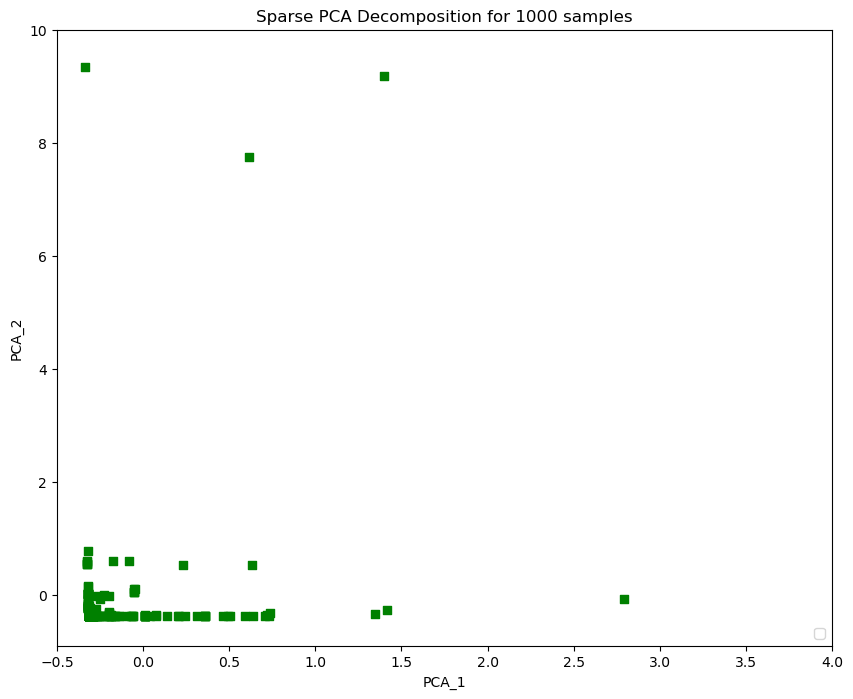

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
plt.scatter(pca_sample[:,0],pca_sample[:,1],color='green',marker='s')
plt.xlim([-0.5,4])
plt.ylim([-0.9,10])
plt.title('Sparse PCA Decomposition for 1000 samples')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(loc='lower right')

In [15]:
from nltk.corpus import stopwords
def preprocess_text(df,stem=True):
    data = df.text.to_list()
    stop_words = set(stopwords.words('english'))
    cleaned_data = []
    for sentence in data:
        cleaned_data.append(' '.join([word.lower() for word in sentence.split() if word.lower() not in stop_words]))
    if stem:
        stem = LancasterStemmer()
        processed_data = []
        for sentence in cleaned_data:
            processed_data.append(''.join([stem.stem(word=word) for word in sentence]))
    else:
        lemmatizer = WordNetLemmatizer()
        processed_data = []
        for sentence in cleaned_data:
            processed_data.append(' '.join([lemmatizer.lemmatize(word=word) for word in sentence.split()]))
    vectorizer = CountVectorizer()
    bag = vectorizer.fit_transform(np.array(processed_data))
    count_array = list(bag)
    pca = SparsePCA(n_components=2,random_state=11,tol=1e-04)
    scaler = StandardScaler(with_mean=True, with_std=True,)
    
    start = 1000
    sample = np.array([count_array[i].toarray() for i in range(start)]).reshape((start,-1))
    scaled_sample = scaler.fit_transform(sample)
    df = pca.fit_transform(scaled_sample)
    sample_len = 2000
    while sample_len < 2001: 
    # while sample_len < len(processed_data):
        print(f'Iterating through text {start} - {sample_len} of the data....')
        sample = np.array([count_array[i].toarray() for i in range(start,sample_len)]).reshape((1000,-1))
        scaled_sample = scaler.fit_transform(sample)
        pca_sample = pca.fit_transform(scaled_sample)
        df = np.vstack((df,pca_sample))
        start += 1000
        sample_len += 1000
        
    print(f'Iterating through the last text of the data....')
    sample_len = len(processed_data)
    shape = sample_len-start
    sample = np.array([count_array[i].toarray() for i in range(start,sample_len)]).reshape((shape,-1))
    scaled_sample = scaler.fit_transform(sample)
    pca_sample = pca.fit_transform(scaled_sample)
    df = np.vstack((df,pca_sample))
    
    return df
    

In [ ]:
df = preprocess_text(df,stem=True)
dfx = pd.DataFrame(df)
dfx.to_csv('dfx.csv')

Iterating through text 1000 - 2000 of the data....
Iterating through the last text of the data....


In [ ]:
len(cleaned_data)


In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df[:,0],df[:,1],color='green',marker='s')
# plt.xlim([-2,4])
# plt.ylim([-2,10])
plt.title('Sparse PCA Decomposition for 1000 samples')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(loc='lower right')

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df[:,0],df[:,1],color='green',marker='s',edgecolor='black')
plt.xlim([-15,100])
plt.ylim([-50,100])
plt.title('Sparse PCA Decomposition for 1000 samples')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.grid()
plt.legend(loc='lower right')

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.spatial.distance import pdist

In [ ]:
X = df

k = 3
agglo_complete = AgglomerativeClustering(linkage='complete',n_clusters = k).fit(X)
y_km = km_plus.fit_predict(df)
unique_labels = set(km_plus.labels_)
unique_labels = set(agglo_complete.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_complete_labels = (agglo_complete.labels_ == k)

    xy = X[agglo_complete_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Complete linkage: %d' % agglo_complete.n_clusters)
plt.subplot(2, 2, 4)
